In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from imutils import grab_contours


## Image feature extraction and comparison
Yixuan Wang 530634085
#### Proble: simple grayscale thresholding cannot be applied to real-world image with various backgrounds.
#### This note book aims to denoise hand images to naive binary images
#### Techniques used in this work: hsv conversion, Ycbcr conversion, Ostu thresholding, adaptive thresholding
#### In general, cb/cr has good performance in image denoising and  edge detecting.Otsu thresholding effectively transforms the image into the binary format. This combination can be considered as a potential solution in this project
#### After this step, we will start process the binary image, extract contours and conduct calculations.



In [16]:
path = "images\image7.jpg"#background noise
# path = "images\shadow.jpg"# shadow..

img=cv2.imread(path)


<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\yixua\AppData\Local\Temp\ipykernel_22160\567412362.py:1: SyntaxWarning: invalid escape sequence '\i'
  path = "images\image7.jpg"#background noise


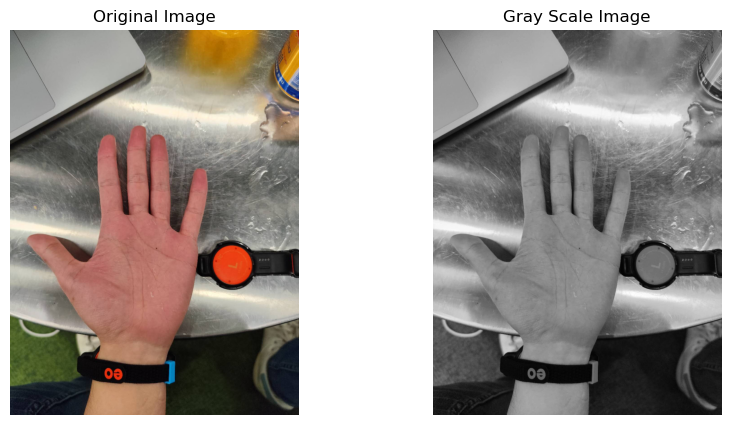

In [17]:
gray_scale=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(gray_scale, cmap="gray")
ax[1].set_title("Gray Scale Image")
ax[1].axis("off")
plt.show()

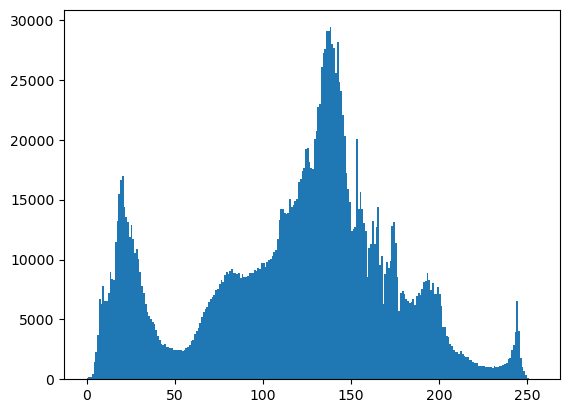

In [18]:
# show the histogram of the gray scale image
plt.hist(gray_scale.ravel(), 256, [0, 256])
plt.show()

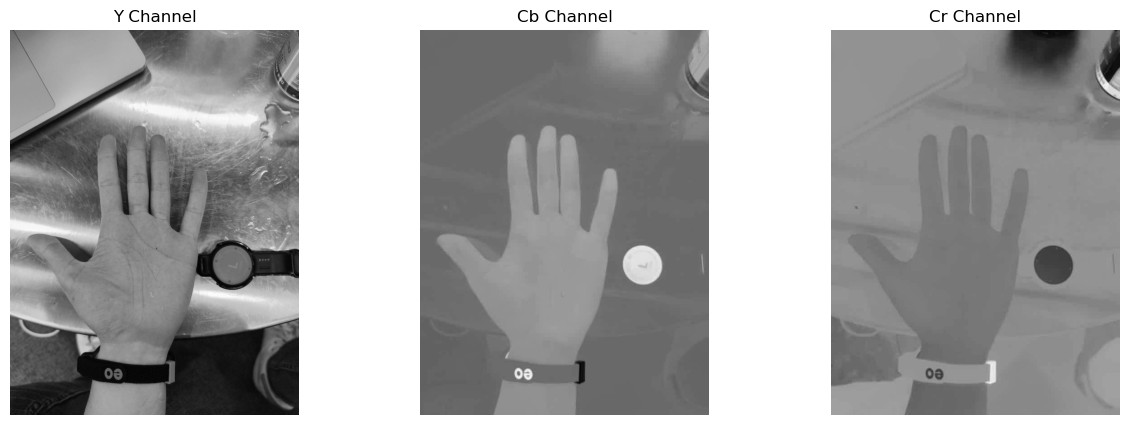

In [19]:
# YCbCr color space，display the Y, Cb, Cr channels
ycbcr=cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(ycbcr[:,:,0], cmap="gray")
ax[0].set_title("Y Channel")
ax[0].axis("off")

ax[1].imshow(ycbcr[:,:,1], cmap="gray")
ax[1].set_title("Cb Channel")
ax[1].axis("off")

ax[2].imshow(ycbcr[:,:,2], cmap="gray")
ax[2].set_title("Cr Channel")
ax[2].axis("off")

plt.show()

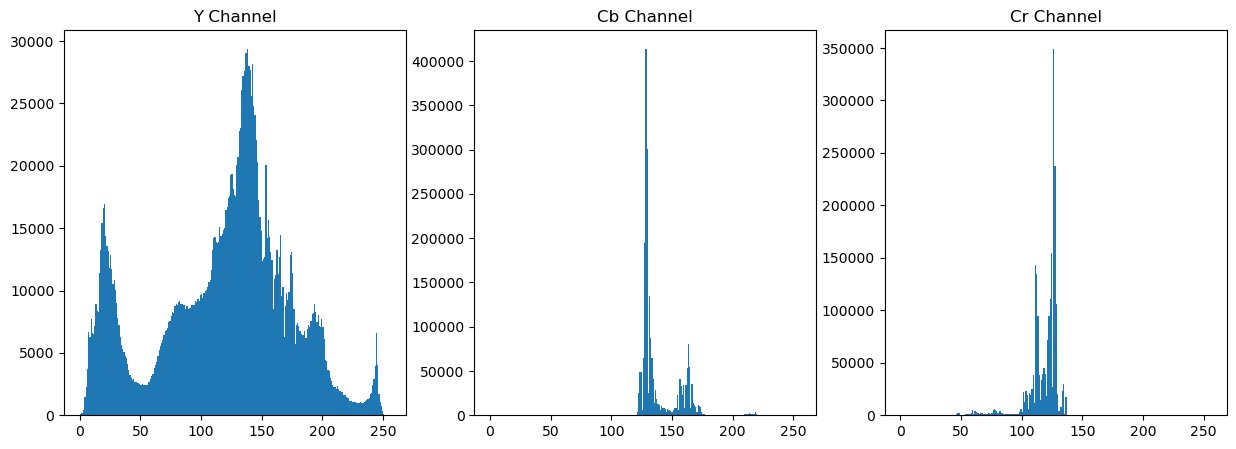

In [20]:
# display the three histogram of the ycbcr image
y, cb, cr = cv2.split(ycbcr)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(y.ravel(), 256, [0, 256])
ax[0].set_title("Y Channel")
ax[1].hist(cb.ravel(), 256, [0, 256])
ax[1].set_title("Cb Channel")
ax[2].hist(cr.ravel(), 256, [0, 256])
ax[2].set_title("Cr Channel")
plt.show()

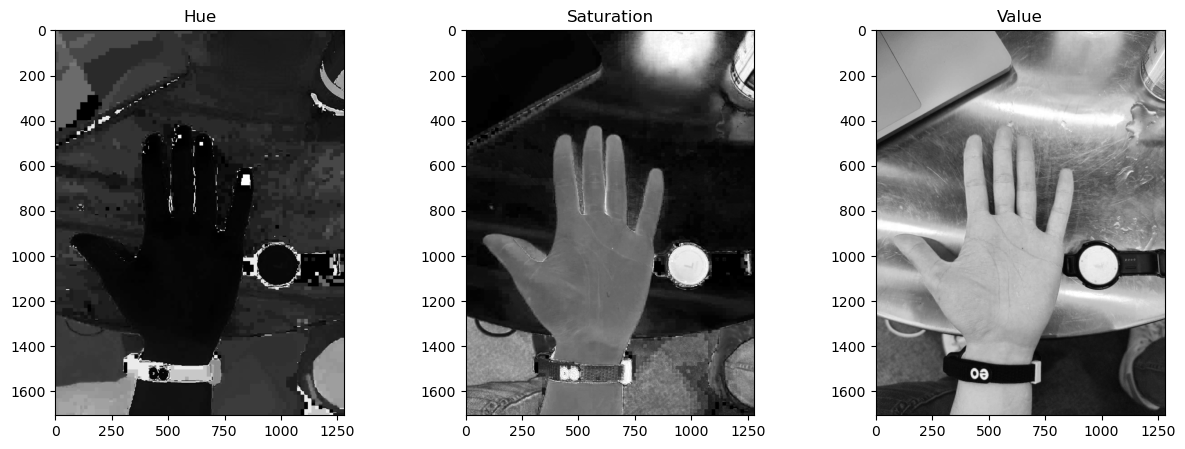

In [21]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv.shape
# visulaize it in three channels
h, s, v = cv2.split(hsv)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(h, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(s, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(v, cmap='gray')
ax[2].set_title('Value')
plt.show()


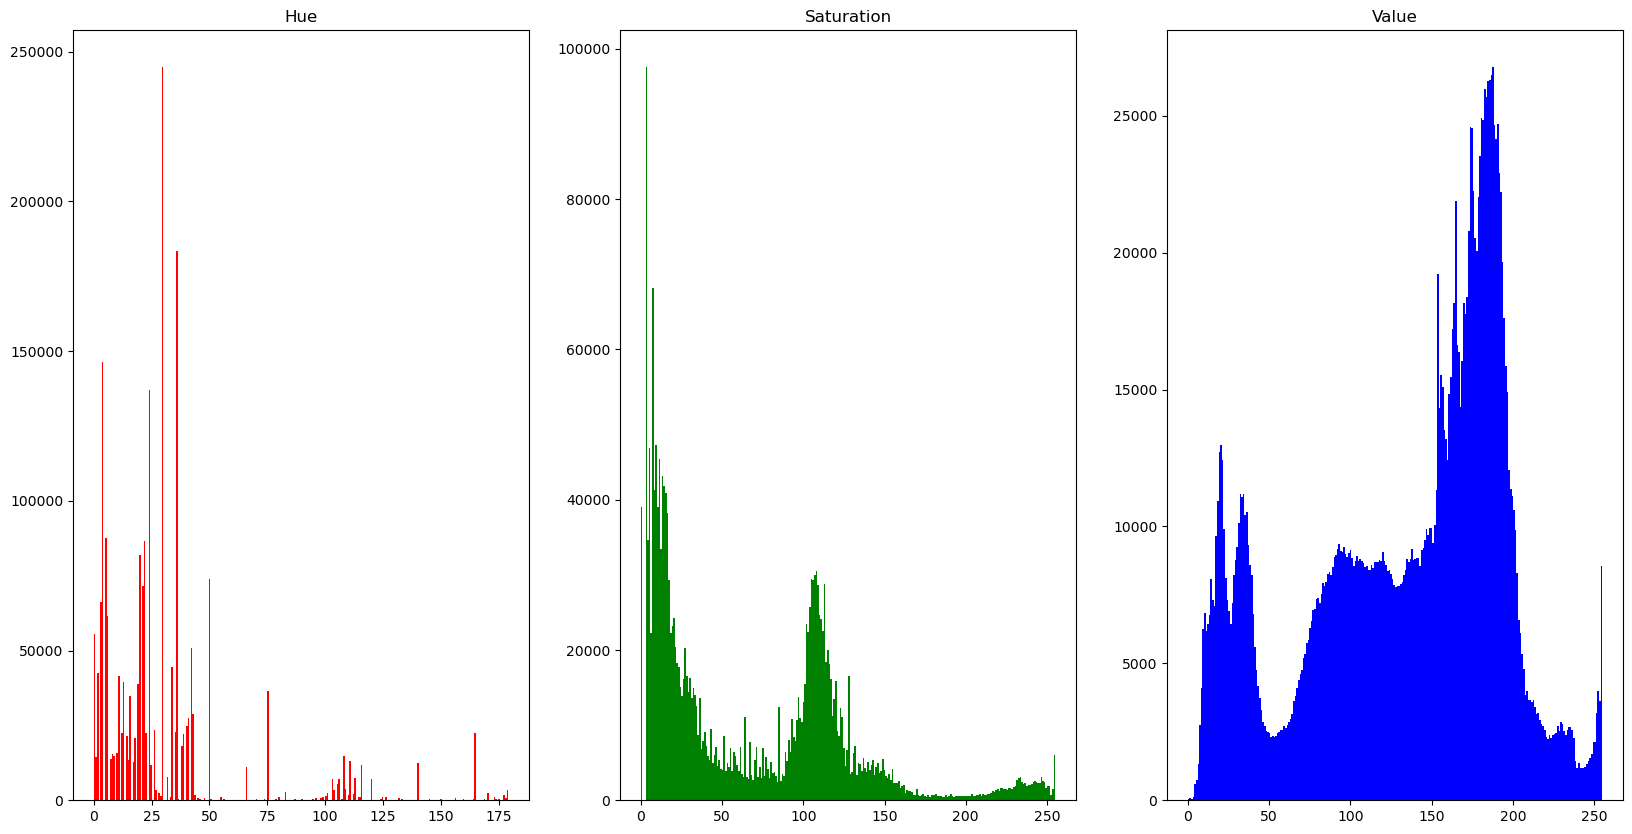

In [22]:
# show the histogram of hsv image in three channels
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].hist(h.ravel(), bins=256, color='red')
ax[0].set_title('Hue')
ax[1].hist(s.ravel(), bins=256, color='green')
ax[1].set_title('Saturation')
ax[2].hist(v.ravel(), bins=256, color='blue')
ax[2].set_title('Value')
plt.show()

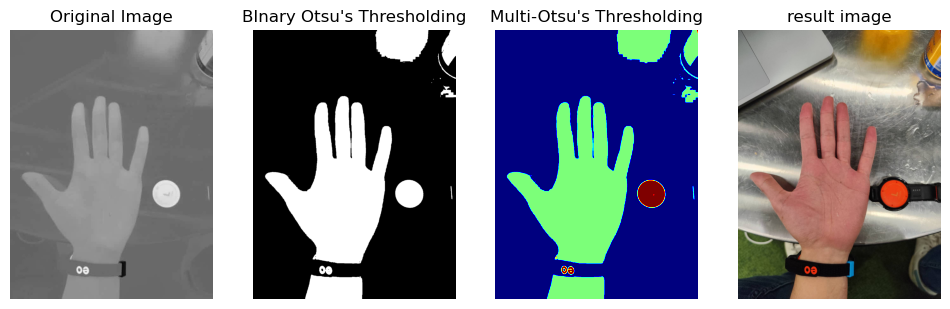

In [23]:
from skimage.filters import threshold_multiotsu

# apply otsu's thresholding to seperate the image to 3 classes
target_channel=cb
_, thresh1 = cv2.threshold(target_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# apply adaptive thresholding
thresholds = threshold_multiotsu(target_channel)
regions = np.digitize(target_channel, bins=thresholds)

thresh2 = cv2.adaptiveThreshold(target_channel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh3 = cv2.adaptiveThreshold(target_channel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

fig, ax = plt.subplots(1, 4, figsize=(12, 5))
ax[0].imshow(target_channel, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(thresh1, cmap="gray")
ax[1].set_title("BInary Otsu's Thresholding")
ax[1].axis("off")

ax[2].imshow(regions, cmap="jet")
ax[2].set_title("Multi-Otsu's Thresholding")
ax[2].axis("off")

ax[3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),)
ax[3].set_title("result image")
ax[3].axis("off")

# ax[3].imshow(thresh3, cmap="gray")
# ax[3].set_title("Adaptive Gaussian Thresholding")
# ax[3].axis("off")

plt.show()




In [24]:
# apply otsu's thresholding to seperate the image to 3 classes
regions[regions==0]=2

In [25]:
def is_circle( contour, epsilon=0.15):
    area = cv2.contourArea(contour)
    if area == 0:
        return False
    (_, _), radius = cv2.minEnclosingCircle(contour)
    circle_area = np.pi * (radius ** 2)
    return abs(area - circle_area) / circle_area < epsilon

In [26]:
def detect_background( image):
    # find the background region based on its greatest frequency
    unique, counts = np.unique(image, return_counts=True)
    for i in range(len(unique)):
        print(f"Value: {unique[i]}, Frequency: {counts[i]}")
    background_value = unique[np.argmax(counts)]
    print(f"Background value: {background_value}")
    masked_image = np.where(image == background_value, 0, 255)
    return masked_image


Value: 0, Frequency: 1591950
Value: 1, Frequency: 566029
Value: 2, Frequency: 25701
Background value: 0
Found 24 contours
The pixel area of the hand is: 428056.0
There are 2 contours
The pixel area of the hand is: 428056.0
The pixel area of the circle is: 24512.0


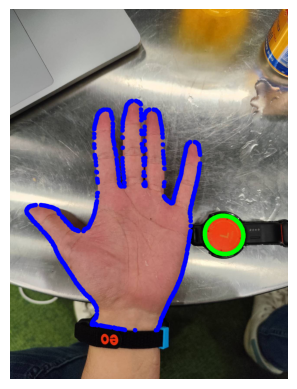

In [27]:
img=cv2.imread(path)
ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
_, cb, _ = cv2.split(ycbcr)
thresholds=threshold_multiotsu(cb, classes=3)
thresh1 = np.digitize(cb, bins=thresholds)
masked_image = detect_background(thresh1)
regions_8u = masked_image.astype('uint8')


CNTS = cv2.findContours(regions_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
CNTS = grab_contours(CNTS)
print("Found {} contours".format(len(CNTS)))
hand = max(CNTS, key=cv2.contourArea)
print("The pixel area of the hand is: {}".format(cv2.contourArea(hand)))
circle = [cnt for cnt in CNTS if is_circle(cnt)]

target = [hand] + list(circle)
print("There are {} contours".format(len(target)))
print("The pixel area of the hand is: {}".format(cv2.contourArea(hand)))

if circle:
    print("The pixel area of the circle is: {}".format(cv2.contourArea(circle[0])))
    cv2.drawContours(img, circle, -1, (0, 255, 0), 20)
else:
    print("No circles found")

cv2.drawContours(img, hand, -1, (255, 0, 0), 20)

# draw the contour on the threshold image, ignore axis
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [28]:
def get_size( hand, target_circle):
    if target_circle is None:
        raise ValueError("Target circle is None")
    actual_area = 1.8*1.8 * 3.14  
    pixel_ratio = actual_area / cv2.contourArea(target_circle)
    return cv2.contourArea(hand) * pixel_ratio


hand_area=get_size(hand,circle[0])

print("The actual area of the hand is: {} squared centimeters".format(hand_area))

The actual area of the hand is: 177.662798694517 squared centimeters
